> here's the [source](https://www.kaggle.com/competitions/titanic/data?select=train.csv "Titanic dataset") of the file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
f_ext = '.csv'

tra_data = pd.read_csv('train' + f_ext) 

In [3]:
# grabbing first 100 in all data
tra_data = tra_data.iloc[:100]
tra_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tra_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Checking for null values
tra_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            22
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          80
Embarked        1
dtype: int64

- "Age" and "Cabin" have a lot of null values 

I will replace null 'age' with median and drop 'cabin' and 'embarked'

In [6]:
import warnings
warnings.filterwarnings('ignore')

d_cols = ['PassengerId','Name','Ticket','Fare','Cabin', 'Embarked']

tra_data.drop(d_cols, axis=1, inplace=True)

m_age = tra_data.Age.median()
tra_data['Age'] = tra_data['Age'].replace(np.nan, m_age)

In [7]:
# final results
tra_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

<AxesSubplot:>

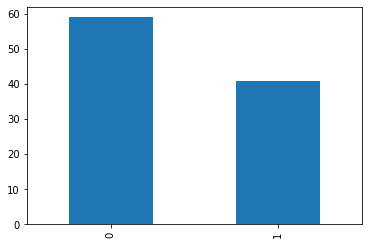

In [8]:
# survivability
tra_data.Survived.value_counts().plot(kind='bar')

<AxesSubplot:>

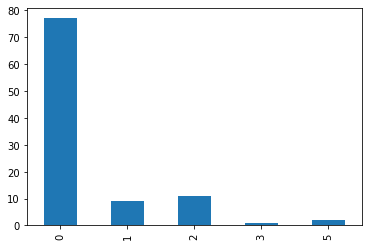

In [9]:
# skewness against 'Parch'
tra_data.Parch.value_counts().sort_index().plot(kind='bar')
# 'Parch' is positively skewed

In [10]:
# labelling data to markers
u_16 = tra_data.Age <= 16

_16_to_36 = (tra_data.Age > 16) & (tra_data.Age <= 36)

_36_to_50 = (tra_data.Age > 36) & (tra_data.Age <= 50)

_50_to_64 = (tra_data.Age > 50) & (tra_data.Age <= 64)

a64 = tra_data.Age > 64

tra_data.loc[u_16, 'Age'] = 0
tra_data.loc[_16_to_36, 'Age'] = 1
tra_data.loc[_36_to_50, 'Age'] = 2
tra_data.loc[_50_to_64, 'Age'] = 3
tra_data.loc[a64, 'Age'] = 4

# Mapping sex to 0's and 1's so LogisticRegression can work

tra_data.Sex = tra_data.Sex.map({'female' : 1,'male' : 0}).astype(int)

In [11]:
# Finalized training data
tra_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,1.0,1,0
1,1,1,1,2.0,1,0
2,1,3,1,1.0,0,0
3,1,1,1,1.0,1,0
4,0,3,0,1.0,0,0


In [12]:
print(tra_data.columns)

# taking Y as survived 
X = tra_data.drop(['Survived'], axis=1).values
# taking X as other column(s)
y = tra_data['Survived'].values

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
# Using logistic regression as many labels ar present
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred = regr.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[12  1]
 [ 1 11]]


In [15]:
ac = accuracy_score(y_test,y_pred)
print(f'Accuracy: {ac :.3%}')

Accuracy: 92.000%
